In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [112]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [238]:
data = pd.read_csv('final_3.csv')
df = pd.DataFrame(data)


# make the test data and test label

In [379]:
test_label = np.array(df['label'])
test_data = df.drop(['volume','close','adj Close','low','high','open','label','Unnamed: 0','time','pattern','previous_close','high-low','high-pc','low-pc','tr','atr','upperband','lowerband'],axis=1)
test_data.head(70)

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,in_uptrend
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


In [380]:
pr_d = test_data[12:13]
pr_l = test_label[12:13]
pr_d,pr_l

(    CDL2CROWS  CDL3BLACKCROWS  CDL3INSIDE  CDL3LINESTRIKE  CDL3OUTSIDE  \
 12          0               0           0               0            0   
 
     CDL3STARSINSOUTH  CDL3WHITESOLDIERS  CDLABANDONEDBABY  CDLADVANCEBLOCK  \
 12                 0                  0                 0                0   
 
     CDLBELTHOLD  CDLBREAKAWAY  CDLCLOSINGMARUBOZU  CDLCONCEALBABYSWALL  \
 12            0             0                 100                    0   
 
     CDLCOUNTERATTACK  CDLDARKCLOUDCOVER  CDLDOJI  CDLDOJISTAR  \
 12                 0                  0        0            0   
 
     CDLDRAGONFLYDOJI  CDLENGULFING  CDLEVENINGDOJISTAR  CDLEVENINGSTAR  \
 12                 0             0                   0               0   
 
     CDLGAPSIDESIDEWHITE  CDLGRAVESTONEDOJI  CDLHAMMER  CDLHANGINGMAN  \
 12                    0                  0          0              0   
 
     CDLHARAMI  CDLHARAMICROSS  CDLHIGHWAVE  CDLHIKKAKE  CDLHIKKAKEMOD  \
 12          0              

## change data for pandas dataframe to numpy array and change them to float16

In [381]:
test_data = np.array(test_data).astype('float32')
test_label = np.array(test_label).astype('float32')

## change the numpy array data to tensorflow data

In [382]:
test_data = tf.constant(test_data)
test_label = tf.constant(test_label)

In [383]:
# pr = tf.constant(np.array(pr_d).astype('int32'))

In [384]:
# pr

In [385]:
shape = test_data.shape


In [386]:
from sklearn.datasets import make_circles


#make 1000 eg
n_samples = 1000

##create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state =42)


In [387]:
# lets make a model 

# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['accuracy']
             )

# fit the model
history = model.fit(test_data,test_label,epochs=5)


Epoch 1/5
40/40 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4790   
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790


In [388]:
model.predict(pr)

ValueError: in user code:

    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\user\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_64 is incompatible with the layer: expected axis -1 of input shape to have value 62 but received input with shape (None, 63)


In [389]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 4)                 252       
_________________________________________________________________
dense_212 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 5         
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


In [390]:
train_data = test_data

In [391]:
np.amin(train_data),np.amax(train_data)

(-200.0, 200.0)

In [392]:
train_data_norm = train_data / 200.0
np.amin(train_data_norm),np.amax(train_data_norm)

(-1.0, 1.0)

In [393]:
train_data_norm

<tf.Tensor: shape=(1259, 62), dtype=float32, numpy=
array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [-0.5  ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005]],
      dtype=float32)>

In [401]:
# buil a model with nomalized data

# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

# compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy']
             )

# fit the model
history_norm = model.fit(train_data_norm,test_label,epochs=25)

Epoch 1/25
40/40 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3074   
Epoch 2/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 3/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 4/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 5/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 6/25
40/40 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.4790
Epoch 7/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 8/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 9/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 10/25
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 11/25
40/40 [===========================

<AxesSubplot:title={'center':'normalized data'}>

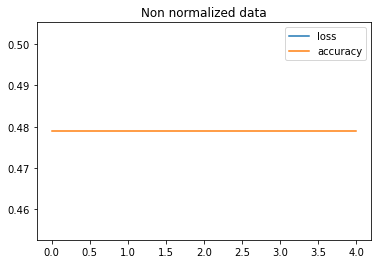

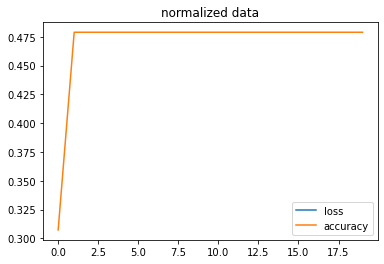

In [397]:
pd.DataFrame(history.history).plot(title='Non normalized data')
pd.DataFrame(history_norm.history).plot(title='normalized data')

In [398]:
# buil a model with to find the best lerning rate

# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

# compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['accuracy']
             )

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3 * 10**(epochs/20))

# fit the model
history_find_rl = model.fit(train_data_norm,
                         test_label,
                         epochs=40,callbacks=[lr_schedular]
                        )

Epoch 1/40
40/40 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3074   
Epoch 2/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 3/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 4/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 5/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 6/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 7/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 8/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 9/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 10/40
40/40 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4790
Epoch 11/40
40/40 [===========================

In [428]:
history_find_rl.history

{'loss': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'accuracy': [0.3073868155479431,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695648,
  0.4789515435695

Text(0.5, 1.0, 'find the ideal learning rate ')

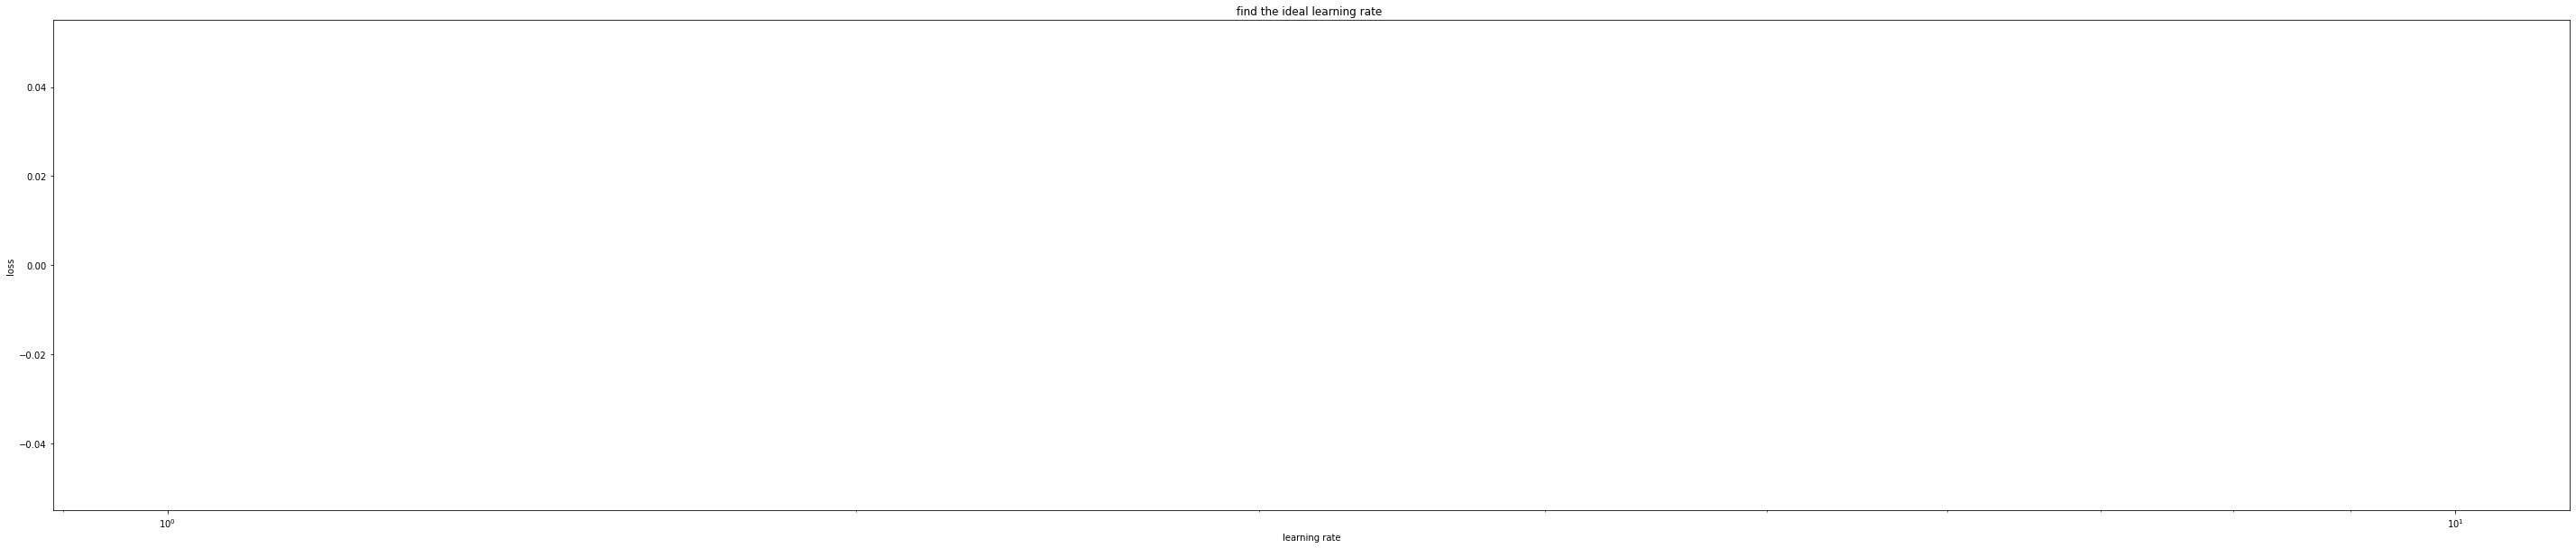

In [426]:
### import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
# plt.semilogx(figsize=(10,7)
plt.figure(figsize=(50,10))
plt.semilogx(lrs, history_find_rl.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('find the ideal learning rate ')

           

In [431]:
train_data_norm

<tf.Tensor: shape=(1259, 62), dtype=float32, numpy=
array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [-0.5  ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.005]],
      dtype=float32)>

In [451]:
# buil a model with nomalized data

# set random seed
tf.random.set_seed(42)

# create model
model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(4, activation = 'relu'),
#     tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['accuracy']
             )

# fit the model
history_norm = model.fit(train_data_norm,test_label,epochs=25)

Epoch 1/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 2/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/25
40/40 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 4/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 5/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/25
40/40 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 7/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 9/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/25
40/40 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/25
40/40 [======================

In [452]:
data = pd.read_csv('final_3.csv')
df = pd.DataFrame(data)


In [454]:
df.head(2)

,Unnamed: 0,time,open,high,low,close,adj Close,volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,previous_close,high-low,high-pc,low-pc,tr,atr,upperband,lowerband,in_uptrend,pattern,label
0,0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.035999,NaN,NaN,1.035999,NaN,NaN,NaN,True,0,0.0
1,1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51.830002,1.299999,0.679996,0.620003,1.299999,NaN,NaN,NaN,True,0,0.0


In [496]:
x = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y = [0,0,0,1,0,0,0,0.1,0,-1,0]
x_line = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
y_line = [0,0,0,0,0,0,0,0,0,0,0]

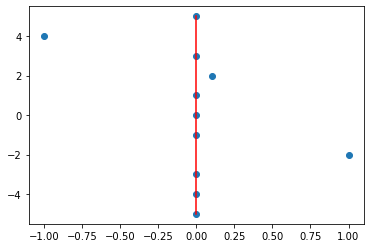

In [508]:
plt.scatter(y,x)
plt.plot(y_line,x_line,c='r')

In [581]:
data = df.drop(['in_uptrend','volume','close','adj Close','low','high','open','Unnamed: 0','time','pattern','previous_close','high-low','high-pc','low-pc','tr','atr','upperband','lowerband'],axis=1)
plot_data_full = df.drop(['in_uptrend','volume','close','adj Close','low','high','open','Unnamed: 0','time','pattern','previous_close','high-low','high-pc','low-pc','tr','atr','upperband','lowerband'],axis=1)
plot_label_full = df['label']
# data.head(5)

In [526]:
plot_data = np.array(plot_data_full).astype('float32')
plot_label = np.array(test_label).astype('float32')

In [527]:
# # Visualize with a plot
# import matplotlib.pyplot as plt
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [556]:
x = plot_data[:,3]
y = plot_label

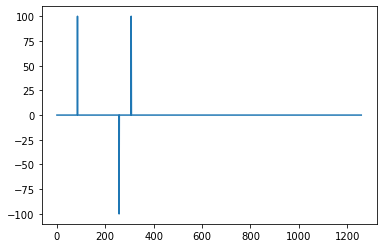

In [571]:
plt.plot(x)

In [561]:
# # plt.scatter(x,y, c=y, cmap=plt.cm.RdYlBu);
# plt.scatter(plot_data[:,0],y,c=y,cmap=plt.cm.RdYlBu);
# plt.scatter(plot_data[:,1],y,c=y,cmap=plt.cm.RdYlBu);
# plt.scatter(plot_data[:,2],y,c=y,cmap=plt.cm.RdYlBu);
# plt.scatter(plot_data[:,4],y,c=y,cmap=plt.cm.RdYlBu);

# plt.xlabel('candle 1')
# plt.ylabel('correct label')

In [553]:
x

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)